# Lung Cancer Classification

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io

from google.colab import files

#TensorFlow utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Activation

#Evaluating and Modelling
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

## Upload Dataset

In [ ]:
# load dataset
#from google.colab import drive

#drive.mount('/drive')
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/LungCancerDataset.csv')

In [2]:
#load dataset
datasets = files.upload()

Saving lung-cancer.csv to lung-cancer.csv


In [80]:
data = pd.read_csv(io.BytesIO(datasets['lung-cancer.csv']))

data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**Columns Description:**
1. Gender: Male or Fale
2. Age: Usia
3. Smoking: Merokok?
4. Yellow Finger
5. Anxiety
6. Peer Presure
7. Chronic Disease
8. Fatigue
9. Allergy
10. Wheezing
11. Alchohol Consuming
12. Coughing
13. Shortness of Breath
14. Swallowing Difficulty
15. Chest Pain
16. Lung Cancer (Target)

note:

**1 - No || 2 - Yes**


## Preprocessing

In [81]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [30]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: >

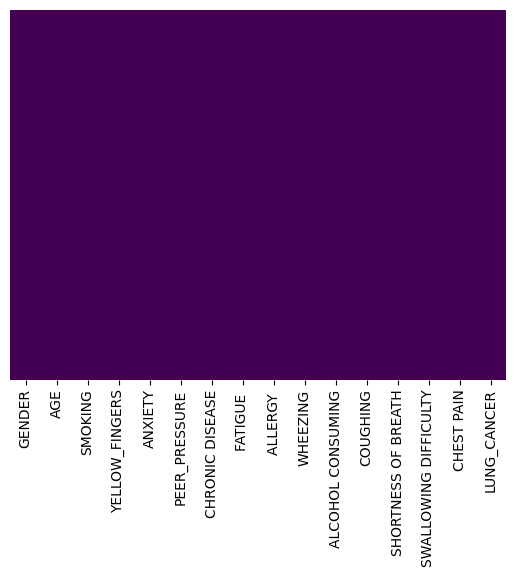

In [31]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

**Drop Duplicate Data**, if exiest (*optional*)

In [83]:
data.drop_duplicates(inplace=True)

In [84]:
data.shape

(276, 16)

**Label Encoding**

In [85]:
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER'])
#data['GENDER']=encoder.fit_transform(data['GENDER'])

data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['YES', 'NO'], [0, 1], inplace=True)
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [86]:
#replace the value '1' to '0' and value '2' to '1' -> in several column
X = data.drop(['LUNG_CANCER'],axis=1)
y = data['LUNG_CANCER']

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0


**Data Outline**

In [87]:
lung_test = data['LUNG_CANCER'].value_counts()

# Access the count of 'Yes' and 'No'
lung_y = lung_test[1]
lung_n = lung_test[0]

print("Count of 'Yes':", lung_y)
print("Count of 'No':", lung_n)

Count of 'Yes': 38
Count of 'No': 238


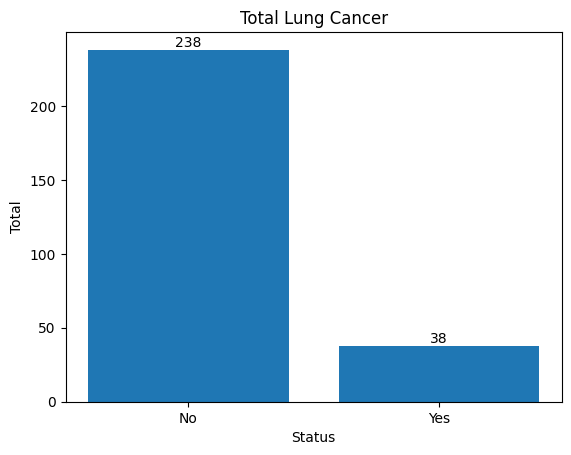

In [88]:
# Create a bar plot
plt.bar(['No', 'Yes'], [lung_n, lung_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Lung Cancer')

# Add value labels on top of each bar
plt.text(0, lung_n, str(lung_n), ha='center', va='bottom')
plt.text(1, lung_y, str(lung_y), ha='center', va='bottom')

# Display the plot
plt.show()

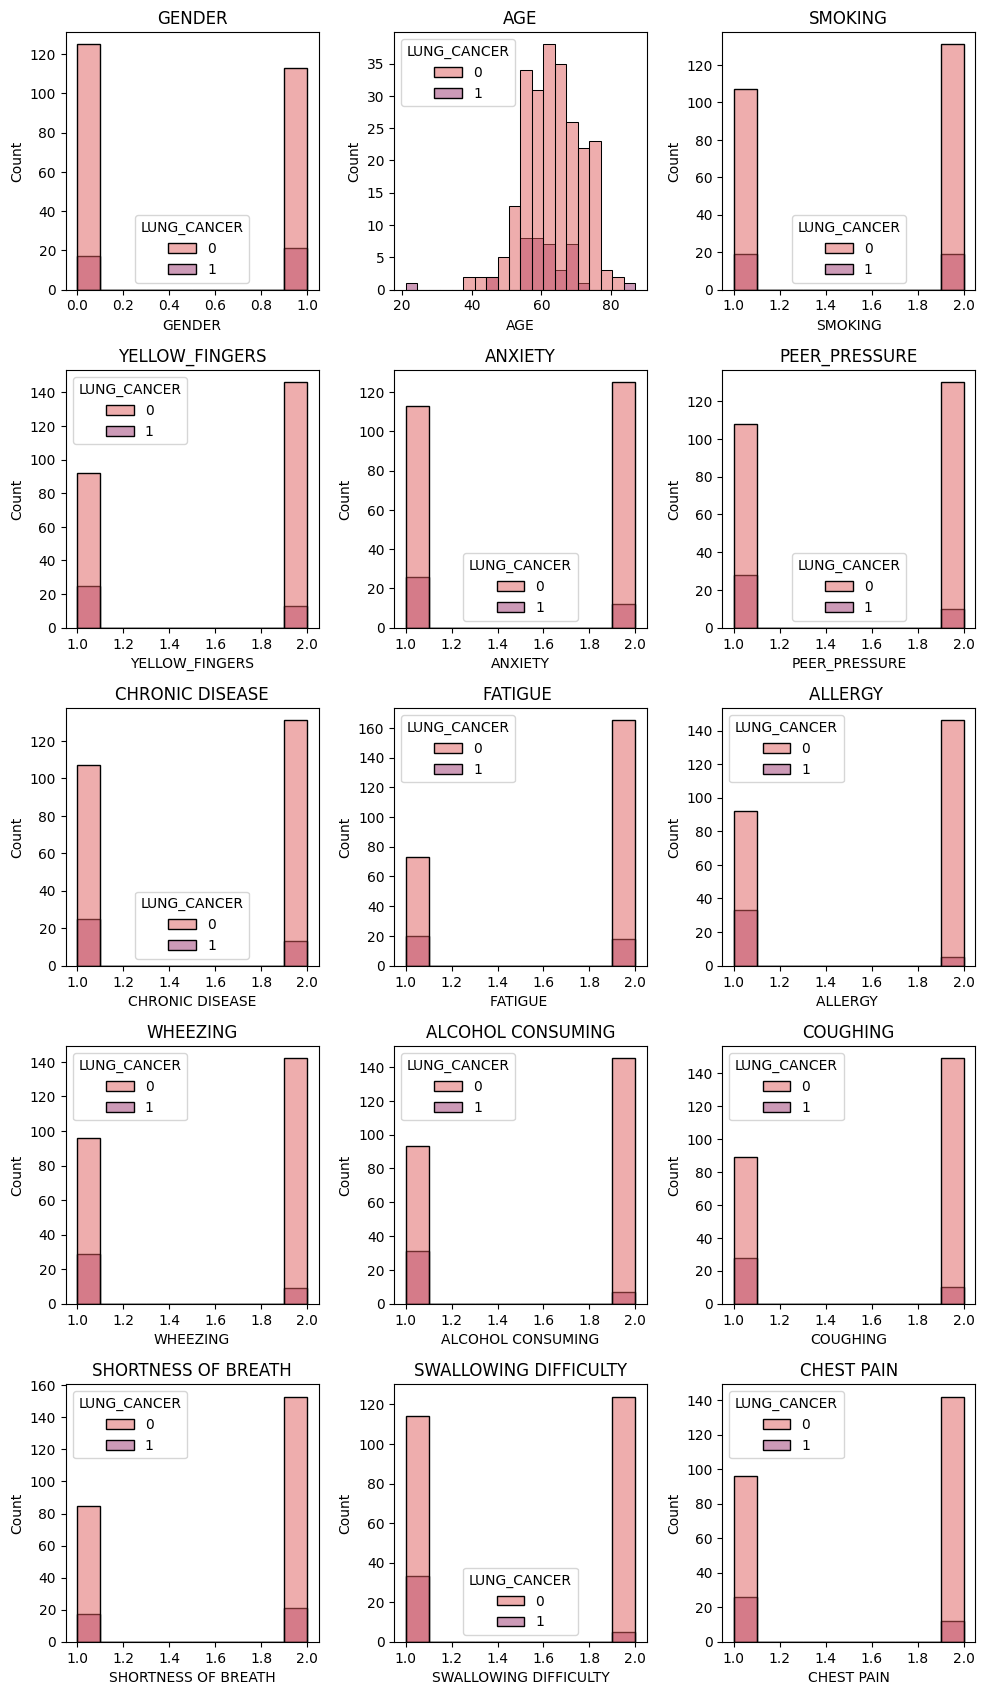

In [89]:
list_column = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']

fig = plt.figure(figsize=(10,20))

for i in range(len(list_column)): #15
    plt.subplot(6, 3, i+1)
    plt.title(list_column[i])
    sns.histplot(data = data, x = data[list_column[i]], hue='LUNG_CANCER', palette='flare')

plt.tight_layout()

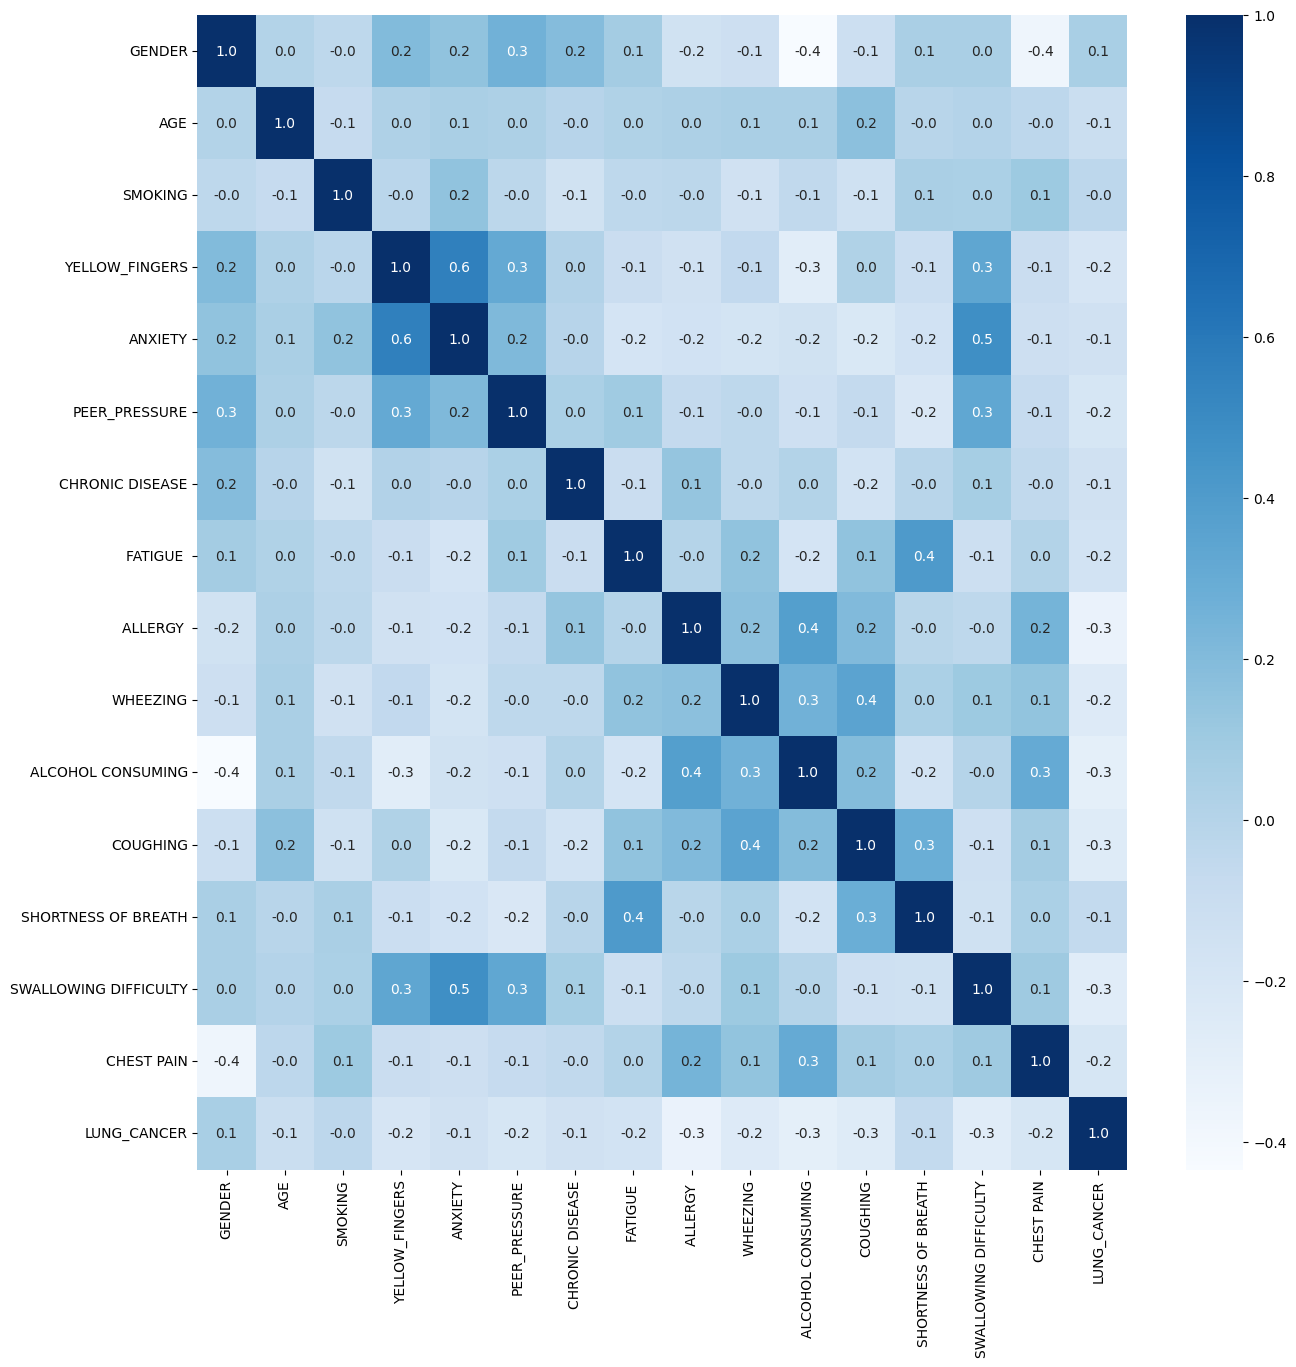

In [90]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');

Correlation among features are:
* 'ANXIETY' and 'SWALLOWING DIFFICULTY' : 0.5
* 'FATIGUE ' and 'SHORTNESS OF BREATH' : 0.4
* 'GENDER' and 'CHEST PAIN' : -0.4
* 'GENDER' and 'ALCOHOL CONSUMING' : -0.5


Correlation with 'LUNG CANCER' are
* 'ALLERGY ', 'ALCOHOL CONSUMING' and 'SWALLOWING DIFFICULTY' : 0.3
* 'YELLOW_FINGERS', 'PEER_PRESSURE', 'FATIGUE ', 'WHEEZING', 'COUGHING' and 'CHEST PAIN' : 0.2

And also, our feature or columns have **positive correlation**. Characterized by the same positive value (1.0) diagonally

## Modeling

We will try to divide the data to ***train-test-validation***.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Train - Test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) #Train - validation

print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}\nValidation shape: {X_val.shape}')

Train shape : (165, 15)
Test shape: (56, 15)
Validation shape: (55, 15)


In [104]:
from imblearn.over_sampling import RandomOverSampler
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

In [105]:
X.shape

(276, 15)

In [106]:
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_train['AGE'] = sc.fit_transform(X_train[['AGE']])
X_val['AGE'] = sc.fit_transform(X_val[['AGE']])
X_test['AGE'] = sc.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1.066324,0,1,0,0,0,1,0,1,1,1,1,0,0
1,0,-0.479467,0,1,1,0,0,1,0,1,1,1,1,1,1
2,1,1.066324,0,1,1,1,1,1,0,0,0,0,0,0,0
3,0,0.845496,1,0,0,0,0,1,0,1,1,1,1,0,1
4,0,-0.810708,0,1,0,0,0,1,0,1,1,1,1,0,0


### Modeling and Find Best Parameter (*optional*)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#def create_model(hidden_unit = 6, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
#def create_model():
#    model = Sequential()
#    model.add(Dense(units = 6, activation = 'relu', input_dim = 15))
#    model.add(Dense(units = 1, activation = 'sigmoid'))

    #model.compile(loss = 'binary_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
#    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #print(model.summary())
    
#    return model

**Tuning Parameter**

In [ ]:
# # Wrapper model with default hyperparameter values
#model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size=128) 

# # Hyperparameters
#embed_dim = [6, 16]
#hidden_unit = [6, 16]
#dropout_rate = [0.2]
#optimizers = [Adam, RMSprop]
#learning_rate = [0.01, 0.001, 0.0001]
#epochs = [10]
#batch_size = [10]

#param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, learning_rate = learning_rate, 
#                  optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# # Evaluation model with GridSearchCV to know what the best hyperparameter for model
#grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
#grid_result = grid.fit(X_train_scaled, y_train)

#results = pd.DataFrame()
#results['means'] = grid_result.cv_results_['mean_test_score']
#results['stds'] = grid_result.cv_results_['std_test_score']
#results['params'] = grid_result.cv_results_['params']

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Model: "sequential_380"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_763 (Dense)           (None, 6)                 96        
                                                                 
 dense_764 (Dense)           (None, 6)                 42        
                                                                 
 dense_765 (Dense)           (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


<ipython-input-86-88b213531611>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size=128)


None
Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 0.5951 - accuracy: 0.7035
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8430
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8779
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9070
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9302
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 0.9302
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9419
Epoch 8/10
18/18 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.9477
Epoch 9/10
18/18 [==============================] - 0s 3ms/step - loss: 0.1401 - accuracy: 0.9477
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8409
Model: "sequenti

In [ ]:
#results

,means,stds,params
0,0.861205,0.062143,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
1,0.860994,0.033277,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
2,0.856342,0.074334,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
3,0.851691,0.054568,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
4,0.643552,0.100227,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
5,0.679598,0.248045,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
6,0.870402,0.059841,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
7,0.856977,0.062791,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
8,0.754123,0.075336,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."
9,0.833087,0.074499,"{'batch_size': 10, 'embed_dim': 6, 'epochs': 1..."


In [ ]:
#Grid
#Best: 0.898203 using {'batch_size': 10, 'embed_dim': 16, 'epochs': 10, 'hidden_unit': 6, 'learning_rate': 0.01, 'optimizers': <class 'keras.optimizers.legacy.adam.Adam'>}

#model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        #dropout_rate = 0.2,
                        #embed_dim = 16,
                        #hidden_unit = 6,
                        #optimizers = Adam,
                        #learning_rate = 0.01,
                   
                        # Fit Parameters
                        #epochs = 10,
                        #batch_size = 10,
                        # Initiate validation data, which is 50% data from data train. It's used for evaluation model
#                        validation_split = 0.5)

#model_prediction = model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

<ipython-input-200-77c4aa57b922>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


### Modelling

In [107]:
from tensorflow.keras import initializers

model = Sequential(
    [
        Dense(6, activation = 'relu', input_shape=[15]),
        #Dense(3, activation = 'relu'),
        Dense(1, activation = 'sigmoid'),
    ]
)

model.build()

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 96        
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=200, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/200
19/19 [==============================] - 1s 12ms/step - loss: 0.8331 - accuracy: 0.4452 - val_loss: 1.0053 - val_accuracy: 0.3273
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.4932 - val_loss: 0.8604 - val_accuracy: 0.4364
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 0.7037 - accuracy: 0.5514 - val_loss: 0.7439 - val_accuracy: 0.5455
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.5925 - val_loss: 0.6693 - val_accuracy: 0.6182
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6541 - val_loss: 0.6134 - val_accuracy: 0.6727
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6815 - val_loss: 0.5785 - val_accuracy: 0.7091
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.7192 - val_loss: 0.5547 - val_accuracy: 0.7273
Epoch 8/200


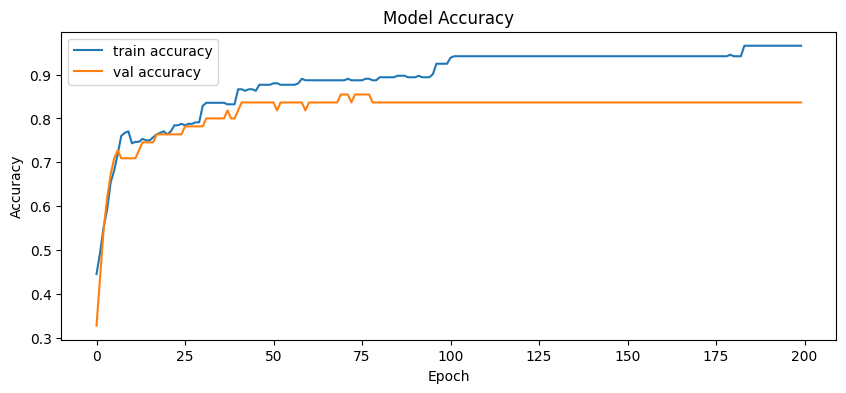

In [110]:
# Visualization model accuracy (train and val accuracy)
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

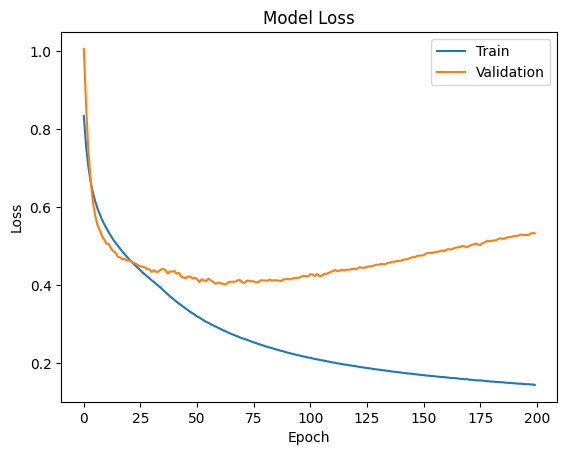

In [111]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [112]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.2622 - accuracy: 0.9107
Test loss: 0.26217177510261536
Test accuracy: 0.9107142686843872


2/2 [==============================] - 0s 4ms/step
Confusion Matrix


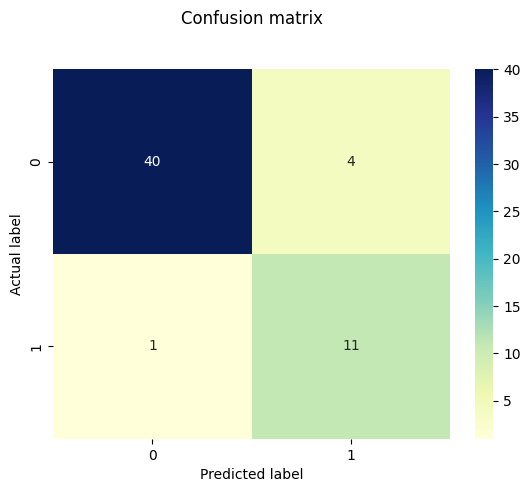

In [113]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true.round(), y_pred.round())

print("Confusion Matrix")
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [114]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.73      0.92      0.81        12

    accuracy                           0.91        56
   macro avg       0.85      0.91      0.88        56
weighted avg       0.92      0.91      0.91        56



For this '**Lung Cancer Detection**' cases. All of the report aspect is important, but for me `Recall` is one of the most important here. Because we don't want to have a worng prediction.
<br><br>
We got (Recall):<br>
**0 = 91%** <br>
**1 = 92%** <br>

So, it's quite good enough for our Model.




## ML Model

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9354838709677419


### Decision Tree

In [54]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9516129032258065


## Save Model

In [115]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [116]:
model.save('my_model.h5')

Download the model with **.pb** format. (for TFServing)

In [117]:
files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Model

In [119]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [120]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 7ms/step - loss: 0.2622 - accuracy: 0.9107
Restored model, accuracy: 91.07%
